# Um breve resumo da história
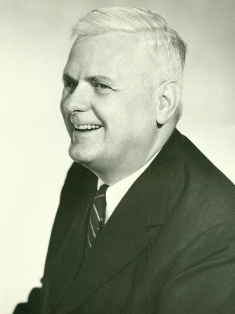

* Em **1930** Alonzo Church, orientador de Alan Turing, desenvolve o Cálculo Lambda (λ). A idéia principal era desenvolver o sistema mais simples possível capaz de estudar **funções** e aplicação de **funções**.

  Exemplo:
  * Função identidade: `λx.x`
  * Aplicação da função identidade: `(λx.x) 2` -> `2`;
    
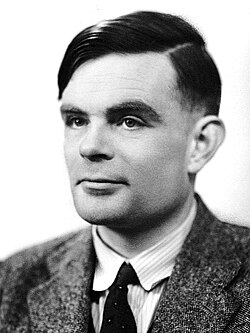    
* Em **1936** Alan Turing invente a *"a-machine"* (automatic machine -> máquina automática), futuramente chamada de Máquina de Turing por Alonzo Church em uma revisão do paper do Alan Turing. O objetivo era prover uma descrição matemática de um dispositivo simples capaz de fazer computações arbitrárias e, a partir deste, mostrar propriedades da computação em geral. Com isso, Turing mostrou que o [problema da decisão](https://pt.wikipedia.org/wiki/Entscheidungsproblem) é não computável.
  
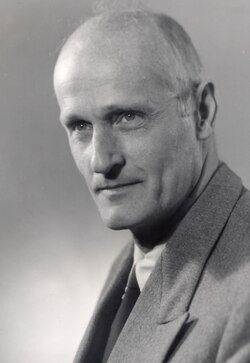
* Em **1952** Stephen Cole Kleene cunha o termo "Tese de Church-Turing" em seu paper *Recursive Predicates and Quantifiers*. A Tese de Church-Turing demonstra a equivalência entre Cálculo Lambda e a Máquina de Turing, ou melhor, nas palavras de Turing: "Toda 'função que seria naturalmente considerada computável' pode ser computada por uma Máquina de Turing.".

Uma anologia é dizer que o Cálculo Lambda representa a abstração Linguagens de Programaçã, enquanto a Máquina de Turing simboliza o comportante do hardware.

# Ok... E cadê o banco de dados?
Calma pequeno gafanhoto, já chegamos lá.

Mas para entender um banco do **dados** precisamos primeiro nos questionar: O que é **dado**?

Os primeiros computares separavam os **dados** do **programa**. O programa era uma "caixa preta" que recebia dados, fazia computações e devolvia novos dados.

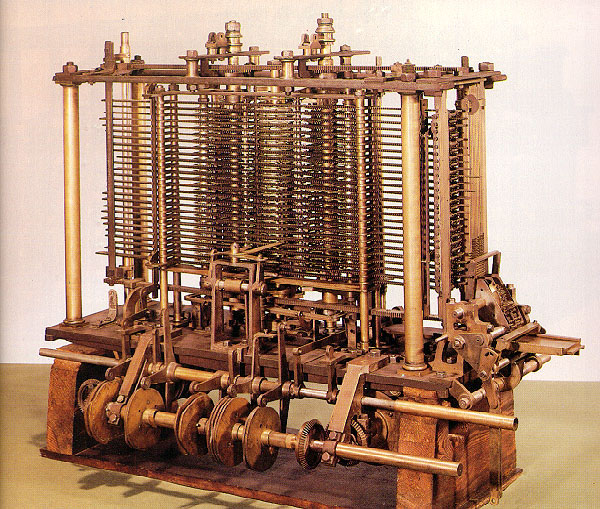

A máquina diferencial de Charles Baggage sendo o exemplo mais clássico.

As máquinas não eram programáveis através de linguagens, mas sim através das engrenagens.

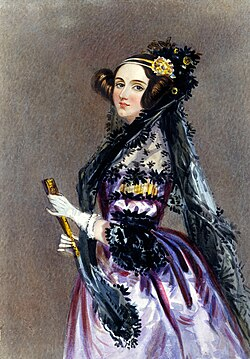

Em 1843 foi publicada a tradução de Ada Lovelace, do francês para o inglês, das notas tomadas por Luigi Menabrea durante uma aula de Charles Baggage.

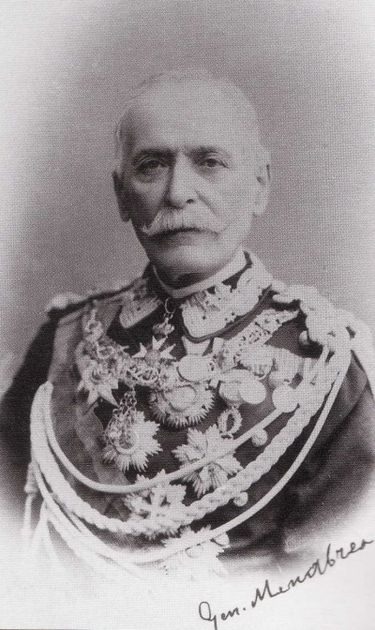

Além da tradução, Lovelace publicou 7 notas, nomeadas de A a G, onde na nota G se encontra o primeiro programa de computador já escrito:

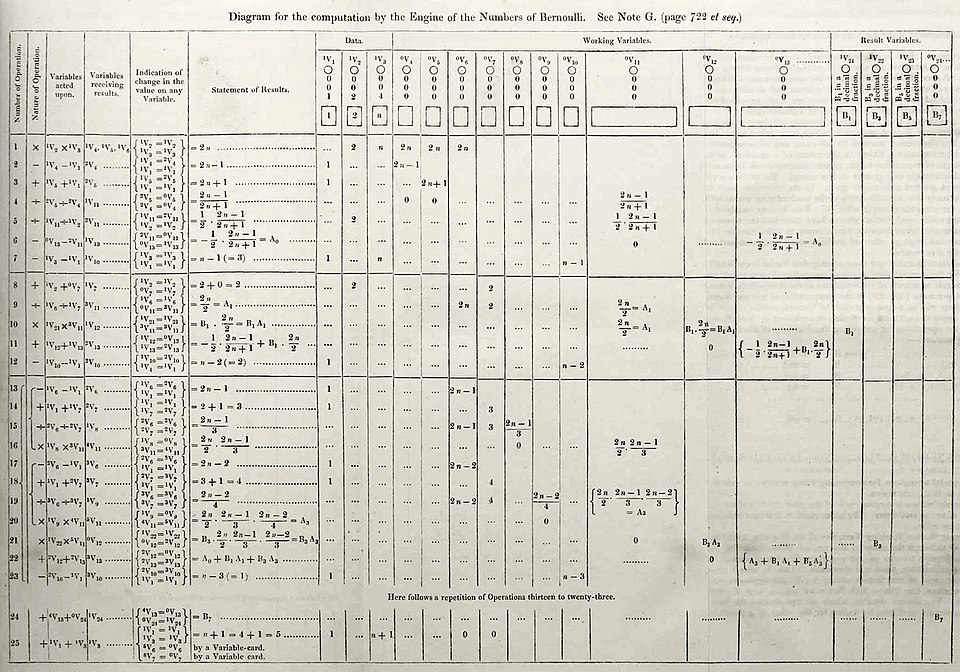

A ideia desse programa era calcular os números de Bernoulli utilizando a máquina análitica de Charles Baggage.

"A máquina pode arranjar e combinar seus valores numéricos exatamente como se fossem letras ou qualquer outro símbolo genérico;
e na verdade ela poderia apresentar seus resultados em notação algébrica, desde que se adotem medidas adequadas."

(Ada Augusta, 1844 in Donald E. Knuth, 1973, p. 1)

# Só mais um pouquinho de história...

**Dado** tem sido tratado como algo externo ao **programa** até esse momento da história, e issi se perpertua no desenvolvimento das primeiras linguagens de programação.

A estrutura sintática clássica que conhecemos hoje:
```C
int main(void) {
    int x = 1;
    int y = 2;
    return x + y;
}
```
encontrada em linguagens como `C`, `C++`, `Java` e ...
Vêm desde o `Algol`.

# LISt Processing (LISP) e uma visão diferente
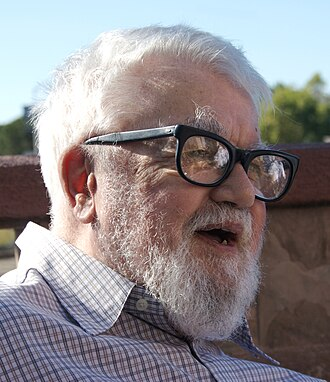

Em 1960 Jhon McCarthy publicou seu paper *Recursive Functions of Symbolic Expressions and Their Computation by Machine, Part I*, responsável pela primeira descrição de uma linguagem LISP.

Dentre as principais diferenças, a mais notável é que LISP não separava dados de código, tudo é dado!

Por exemplo, na linguagem *Scheme*, um programa que soma todos os números uma lista é dado por:

```scheme
(define (soma l)
  (if (nil? l)
      0
      (+ (car l) (soma (cdr l)))) 

(soma '(1 2 3)) ; -> 6
```

Perceba 2 características da função acima:
1. A função é recursiva (vide o nome do paper);
2. Lista e código são representados da mesma forma.

PS: Esse código é longe de ser o melhor para resolver esse problema, mas o que vale é a intenção... 😞

##### Uma breve nota sobre `quote` (`` ' ``)

Como lista pode ser tanto código como dado, o macro `quote` é utilizado para dizer ao compilador/interpretador "Raposo... não compute!".

Ou seja: `'(1 2 3) -> (quote (1 2 3)) -> "Não compute (1 2 3)"`

Caso contrário o compilador/interpretador tentaria tratar `1` como uma função e retornaria um erro.

# Estamos chegando lá...

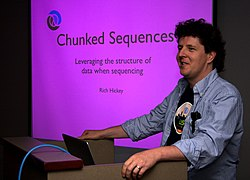

Vamos dar um salto enorme na história e irmos para 2007, onde Rich Hickey libera ao público a implementação de sua linguagem Clojure.

Clojure é um LISP que roda na Java Virtual Machine (JVM) e trás consigo um diferencial enorme em comparação a outros lisps:
Código pode ser representado por diversas estruturas de dados, não somente listas...

Em geral, clojure possui 4 estruturas de dados:
* Listas:    `(1 2 3)`
* Vetores:   `[1 2 3]`
* Mapas:     `{:a 1, :b 2}`
* Conjuntos: `#{1 2 3}`

E todas elas são utilizadas para descrever código!

O exemplo acima seria reescrito em clojure como:

In [1]:
(defn soma
    [l]
    (if (empty? l)
        0
        (+ (first l)
           (soma (rest l)))))

#'user/soma

In [2]:
(soma '(1 2 3))

6

Aqui mora um segredo! Nossa função é tão genérica que ela pode ser aplicada a qualquer outra estrutura de dados apresentadas anteriormente (com exceção do mapa, que relaciona `chave` e `valor`).

In [3]:
(soma [1 2 3])

6

In [4]:
(soma #{1 2 3})

6

# **DATOMIC**!!! (FINALMENTE)

Em 2013 Rich Hickey apresenta ao mundo um novo banco de dados, com um designe bem diferente do tradicional... (ou não)

"Datomic is a general-purpose database intended for systems of record. In many ways, Datomic is unusual." (Kingsbury, 2024)

In [2]:
(require '[clojupyter.display :as display]
         '[clojupyter.misc.helper :as helper]
         '[clojure.pprint :as pp])

(helper/add-dependencies '[com.datomic/peer "1.0.7387"])

(require '[datomic.api :as d])

nil

In [ ]:
(def db-uri "datomic:dev://localhost:4334/mbrainz-1968-1973")

(d/create-database db-uri)
(def conn (d/connect db-uri))
(def db (d/db conn))